In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime

In [3]:
df = pd.read_csv('C:/Users/shubh/Documents/Station_day_Delhi.csv')
df['Date'] = pd.to_datetime(df['Date']) # convert date to values of the date
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df

,Station location,Station code,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,day,year
0,"Alipur, Delhi - DPCC",1,2018-11-11,232.36,415.28,1.72,79.86,43.87,37.40,1.49,23.48,46.28,6.14,17.67,0.28,NaN,NaN,11,11,2018
1,"Alipur, Delhi - DPCC",1,2018-12-11,238.43,348.91,3.25,78.95,44.63,36.04,1.53,14.38,45.31,6.64,13.58,0.30,404.0,Severe,12,11,2018
2,"Alipur, Delhi - DPCC",1,2018-11-13,284.83,427.40,19.98,112.54,76.15,41.25,1.43,21.33,30.40,8.80,43.51,0.94,406.0,Severe,11,13,2018
3,"Alipur, Delhi - DPCC",1,2018-11-14,150.41,214.16,6.35,96.17,56.30,36.02,0.99,12.74,41.87,5.64,28.30,0.51,372.0,Very Poor,11,14,2018
4,"Alipur, Delhi - DPCC",1,2018-11-15,106.11,154.36,7.36,77.52,47.21,30.45,0.70,12.46,27.93,4.20,33.48,0.59,280.0,Poor,11,15,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,"Wazirpur, Delhi - DPCC",38,2020-06-27,41.85,156.20,16.50,31.47,30.21,33.32,1.55,24.48,12.19,2.13,125.57,NaN,112.0,Moderate,6,27,2020
45356,"Wazirpur, Delhi - DPCC",38,2020-06-28,48.42,284.41,28.09,33.03,40.50,29.92,1.44,24.31,12.58,2.46,106.48,NaN,186.0,Moderate,6,28,2020
45357,"Wazirpur, Delhi - DPCC",38,2020-06-29,42.64,172.11,19.53,28.54,31.08,29.70,1.29,19.87,17.99,2.18,32.72,NaN,207.0,Poor,6,29,2020
45358,"Wazirpur, Delhi - DPCC",38,2020-06-30,45.49,101.51,5.84,25.96,18.57,29.42,1.42,18.99,16.34,2.15,14.13,NaN,106.0,Moderate,6,30,2020


In [4]:
#Dealing with Null Values
#null values are filled with values for month  and year
c = df.columns[3:16]
mean_df = df.groupby(['month','Station code'])[c].mean()
mean_df_1 = mean_df.reset_index()


In [5]:
def fill_na(x,y):
    array = x
    array2 = y
    array3 = np.isnan(array)
    for i in range (0,len(array)):
      if (array3[i,0] == True ): 
         for j in range (0,len(array2)):
             if(array[i,1] == array2[j,1] and array[i,2] == array2[j,2]):
                 array[i,0] = array2[j,0]
    return(array)

In [6]:
for i in range(3,16):
 ar =  fill_na(df.iloc[:,[i,1,17]].values , mean_df_1.iloc[:,[i-1,1,0]].values)
 df.iloc[:,[i]] = ar[0:(len(ar)),0]
df = df.drop(['Xylene'], axis = 1)
df.isnull().sum()
df_1= df[(df['AQI'].notna()) & (df['PM2.5'].notna()) & (df['PM10'].notna())]


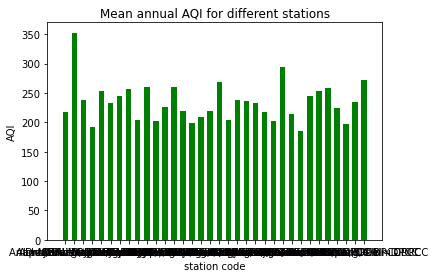

In [29]:
hist = (df_1.groupby(['Station location'])['AQI'].mean())
#hist['month'] = hist.index
#plt.bar(hist.index, hist, color ='black',
       # width = .8)
hist = hist.reset_index()
plt.bar(hist['Station location'], hist['AQI'], color ='green',
        width = 0.6)
plt.xlabel('station code')
plt.ylabel('AQI')
plt.title('Mean annual AQI for different stations')
plt.savefig('Mean annual AQI for different stations')

In [30]:
hist

,Station location,AQI
0,"Alipur, Delhi - DPCC",217.611702
1,"Anand Vihar, Delhi - DPCC",352.636397
2,"Ashok Vihar, Delhi - DPCC",238.437414
3,"Aya Nagar, Delhi - IMD",192.404519
4,"Bawana, Delhi - DPCC",252.579108
5,"Burari Crossing, Delhi - IMD",232.691941
6,"CRRI Mathura Road, Delhi - IMD",244.571046
7,"DTU, Delhi - CPCB",255.946281
8,"Dr. Karni Singh Shooting Range, Delhi - DPCC",204.549675
9,"Dwarka-Sector 8, Delhi - DPCC",260.607742


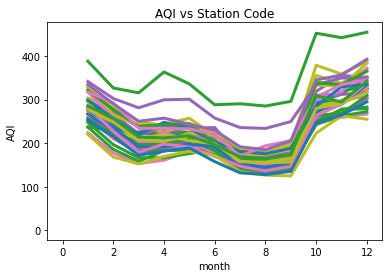

In [26]:
for i in range(1,39):
    plot = df_1.loc[(df_1['Station code'] == i)]
    hist = (plot.groupby(['month'])['AQI'].mean())
    plt.plot(hist.index, hist, [i], linewidth = 3,label = str(i))
    plt.title('AQI vs Station Code')
    plt.xlabel('month')

    plt.ylabel('AQI')
    plt.savefig('AQI vs Station Code')
    
    

In [ ]:
plt.bar()

<BarContainer object of 34 artists>

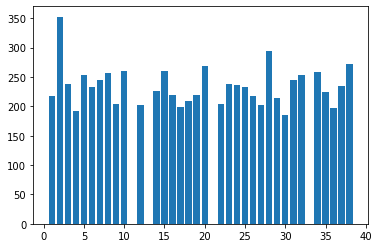

In [23]:
hist = (df_1.groupby(['Station code'])['AQI'].mean())
soc = (hist.sort_values( ascending = False)).index
plt.bar(hist.index, hist)

In [22]:
hist.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 14, 15, 16, 17, 18, 19,
            20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37,
            38],
           dtype='int64', name='Station code')

In [10]:
print('The most polluted Stations are \n')
for i in range(0,len(soc)):
    print(str(i) +'\t'+ soc[i])

The most polluted Stations are 

0	Anand Vihar, Delhi - DPCC
1	Punjabi Bagh, Delhi - DPCC
2	Wazirpur, Delhi - DPCC
3	Mundka, Delhi - DPCC
4	Dwarka-Sector 8, Delhi - DPCC
5	Jahangirpuri, Delhi - DPCC
6	Sirifort, Delhi - CPCB
7	DTU, Delhi - CPCB
8	Rohini, Delhi - DPCC
9	Bawana, Delhi - DPCC
10	R K Puram, Delhi - DPCC
11	CRRI Mathura Road, Delhi - IMD
12	Ashok Vihar, Delhi - DPCC
13	Narela, Delhi - DPCC
14	Nehru Nagar, Delhi - DPCC
15	Vivek Vihar, Delhi - DPCC
16	North Campus, DU, Delhi - IMD
17	Burari Crossing, Delhi - IMD
18	ITO, Delhi - CPCB
19	Sonia Vihar, Delhi - DPCC
20	Mandir Marg, Delhi - DPCC
21	Jawaharlal Nehru Stadium, Delhi - DPCC
22	Alipur, Delhi - DPCC
23	Okhla Phase-2, Delhi - DPCC
24	Pusa, Delhi - DPCC
25	Major Dhyan Chand National Stadium, Delhi - DPCC
26	Dr. Karni Singh Shooting Range, Delhi - DPCC
27	Najafgarh, Delhi - DPCC
28	Patparganj, Delhi - DPCC
29	IGI Airport (T3), Delhi - IMD
30	Lodhi Road, Delhi - IMD
31	Sri Aurobindo Marg, Delhi - DPCC
32	Aya Nagar, Delhi - IM